# Oversampling with SMOTE

Instead of random oversampling here we will use SMOTE technique

In [1]:
from imblearn.over_sampling import SMOTE
from tqdm import tqdm
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [2]:
data=pd.read_csv("data.csv")
enc_data=pd.read_csv("encoded_data.csv")

## Content

<ol>
    <li><a href="#feature-scaling">Feature scaling</a></li>
    <li><a href="#oversampling">Oversampling</a></li>
    <li><a href="#knn">KNN</a>
        <ul>
            <li><a href="#knn-training">Training</a></li>
            <li><a href="#knn-evaluating">Evaluating</a></li>
        </ul>
    </li>
    <li><a href="#logistic-regression">Logistic Regression</a>
        <ul>
            <li><a href="#logistic-regression-training">Training</a></li>
            <li><a href="#logistic-regression-evaluating">Evaluating</a></li>
        </ul>
    </li>
    <li><a href="#svm">SVM</a>
        <ul>
            <li><a href="#svm-training">Training</a></li>
            <li><a href="#svm-evaluating">Evaluating</a></li>
        </ul>
    </li>
    <li><a href="#random-forest">Random Forest</a>
        <ul>
            <li><a href="#random-forest-training">Training</a></li>
            <li><a href="#random-forest-evaluating">Evaluating</a></li>
        </ul>
    </li>
    <li><a href="#ada-boost">AdaBoost</a>
        <ul>
            <li><a href="#ada-boost-training">Training</a></li>
            <li><a href="#ada-boost-evaluating">Evaluating</a></li>
        </ul>
    </li>
    <li><a href="#conclusions">Conclusions</a></li>
</ol>

<a id="feature-scaling"></a>
## Feature scaling

In [3]:
X = enc_data.drop(columns = ['Churn', "customerID"])
y = enc_data['Churn'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=5, stratify=y)

num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']

scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

<a id="oversampling"></a>
## Oversampling

In [4]:
oversample = SMOTE(sampling_strategy='minority')

X_resampled, y_resampled = oversample.fit_resample(X_train, y_train)

pd.Series(y_resampled).value_counts()

0.0    3880
1.0    3880
Name: count, dtype: int64

<a id="knn"></a>
## KNN 

In [23]:
knn_model = KNeighborsClassifier(n_neighbors = 14)
knn_model.fit(X_resampled,y_resampled)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.7336740488358887


<a id="knn-evaluating"></a>
### KNN Evaluating

In [24]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

         0.0       0.91      0.71      0.80      1294
         1.0       0.50      0.81      0.62       467

    accuracy                           0.73      1761
   macro avg       0.70      0.76      0.71      1761
weighted avg       0.80      0.73      0.75      1761



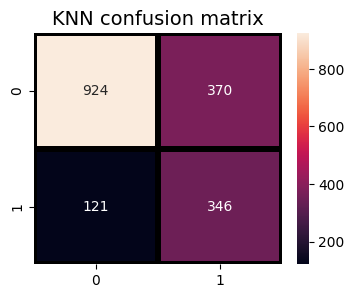

In [7]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predicted_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("KNN confusion matrix",fontsize=14)
plt.show()

In [8]:
N = 30

f1_train = []
f1_test = []
for n_neighbors in range(1, N+1):
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_model.fit(X_resampled, y_resampled)
    predicted_test_y = knn_model.predict(X_test)
    predicted_train_y = knn_model.predict(X_resampled)

    f1_test.append(f1_score(y_test, predicted_test_y))
    f1_train.append(f1_score(y_resampled, predicted_train_y))

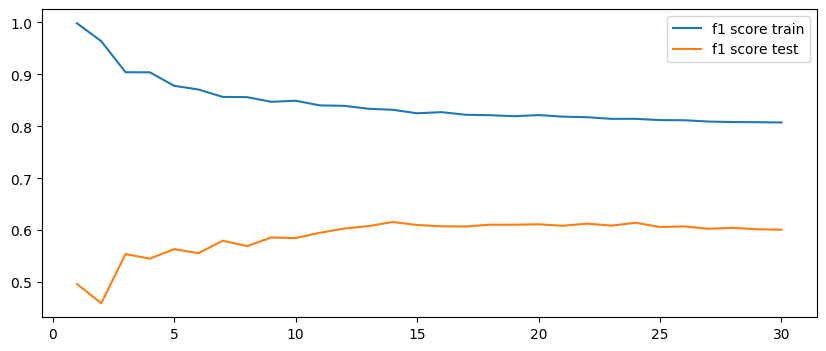

In [9]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot([i for i in range(1, N+1)], f1_train, label="f1 score train")
ax.plot([i for i in range(1, N+1)], f1_test, label="f1 score test")
ax.legend()

<a id="logistic-regression"></a>
## Logistic Regression

<a id="logistic-regression-training"></a>
### Training

In [10]:
lr_model = LogisticRegression()
lr_model.fit(X_resampled,y_resampled)
predicted_y = lr_model.predict(X_test)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :", accuracy_lr)

Logistic Regression accuracy is : 0.7592277115275412


<a id="logistic-regression-evaluating"></a>
### Evaluating

In [11]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

         0.0       0.92      0.74      0.82      1294
         1.0       0.53      0.81      0.64       467

    accuracy                           0.76      1761
   macro avg       0.72      0.78      0.73      1761
weighted avg       0.81      0.76      0.77      1761



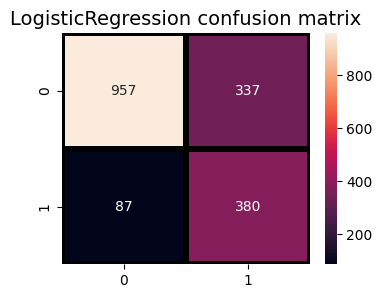

In [12]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predicted_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LogisticRegression confusion matrix",fontsize=14)
plt.show()

<a id="svm"></a>
## SVM

<a id="svm-training"></a>
## Training

In [13]:
svc_model = SVC(random_state = 1)
svc_model.fit(X_resampled,y_resampled)
predicted_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :", accuracy_svc)

SVM accuracy is : 0.7717206132879046


<a id="svm-evaluating"></a>
## Evaluating

In [14]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

         0.0       0.90      0.78      0.83      1294
         1.0       0.55      0.75      0.64       467

    accuracy                           0.77      1761
   macro avg       0.72      0.76      0.73      1761
weighted avg       0.80      0.77      0.78      1761



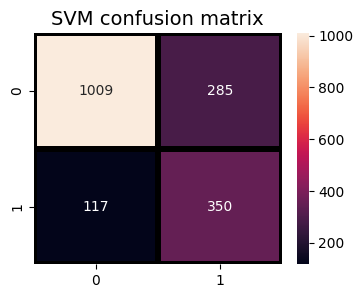

In [15]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predicted_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("SVM confusion matrix",fontsize=14)
plt.show()

<a id="random-forest"></a>
## RandomForest

<a id="random-forest-training"></a>
### Training

In [16]:
model_rf = RandomForestClassifier(n_estimators=300, oob_score = True, n_jobs = -1,
                                  random_state=40, max_leaf_nodes = 30)

model_rf.fit(X_resampled, y_resampled)
# Make predictions
predicted_y = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, predicted_y))

0.7779670641680864


<a id="random-forest-evaluating"></a>
### Evaluating

In [17]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

         0.0       0.91      0.78      0.84      1294
         1.0       0.56      0.78      0.65       467

    accuracy                           0.78      1761
   macro avg       0.73      0.78      0.74      1761
weighted avg       0.81      0.78      0.79      1761



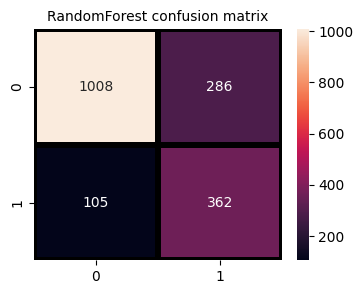

In [18]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predicted_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("RandomForest confusion matrix",fontsize=10)
plt.show()

In [19]:
N = 300

f1_train = []
f1_test = []
for n_estimators in tqdm(range(1, N+1)):
    rf_model = RandomForestClassifier(n_estimators=n_estimators, n_jobs = -1,
                                      random_state=40, max_leaf_nodes = 30)
    rf_model.fit(X_resampled, y_resampled)
    predicted_test_y = rf_model.predict(X_test)
    predicted_train_y = rf_model.predict(X_resampled)

    f1_test.append(f1_score(y_test, predicted_test_y))
    f1_train.append(f1_score(y_resampled, predicted_train_y))

100%|█████████████████████████████████████████| 300/300 [01:11<00:00,  4.18it/s]


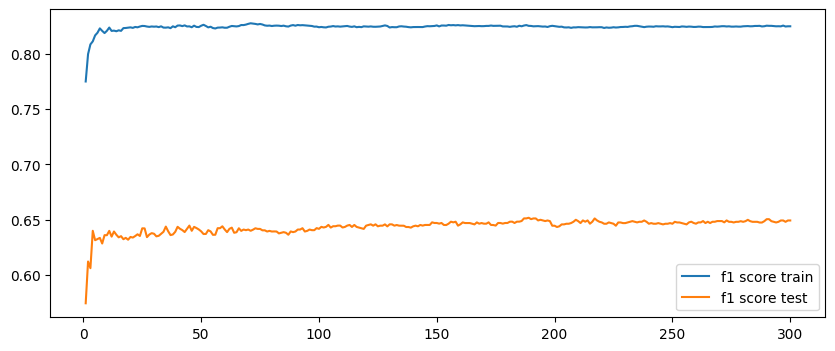

In [20]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot([i for i in range(1, N+1)], f1_train, label="f1 score train")
ax.plot([i for i in range(1, N+1)], f1_test, label="f1 score test")
ax.legend()

<a id="ada-boost"></a>
## AdaBoost

<a id="ada-boost-training"></a>
### Training

In [21]:
ada_model = AdaBoostClassifier()
ada_model.fit(X_resampled, y_resampled)
predicted_y = ada_model.predict(X_test)
print("AdaBoost Classifier accuracy")
metrics.accuracy_score(y_test, predicted_y)

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Classifier accuracy


0.7734241908006815

<a id="ada-boost-evaluating"></a>
### Evaluating

In [22]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

         0.0       0.89      0.79      0.84      1294
         1.0       0.55      0.74      0.63       467

    accuracy                           0.77      1761
   macro avg       0.72      0.76      0.73      1761
weighted avg       0.80      0.77      0.78      1761



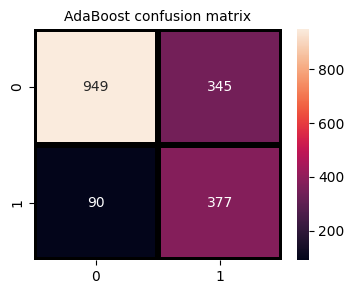

In [42]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predicted_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("AdaBoost confusion matrix",fontsize=10)
plt.show()

<a id="conclusions"></a>
## Conclusions

In this notebook we have done ALL THE SAME as in the previous one but with resampled train data using the random oversampling technique. As a result we have received the next results:

1. **KNN** &ndash; **accuracy** 73.3%, **precision** 50% and **recall** 81% (previous values: accuracy 73.2%, precision 50%, recall 73%)<br><br> 
2. **Logistic Regression** &ndash; **accuracy** 75.9%, **precision** 53% and **recall** 81% (previous values: accuracy 75.2%, precision 52%, recall 80%)<br><br>
3. **SVM** &ndash; **accuracy** 77.1%, **precision** 55% and **recall** 75% (previous values: accuracy 76.1%, precision 53%, recall 78%)<br><br>
4. **RandomForest** &ndash; **accuracy** 77.8%, **precision** 56% and **recall** 78% (previous values: accuracy 76.7%, precision 54%, recall 79%)<br><br>
5. **AdaBoost** &ndash; **accuracy** 77.3%, **precision** 55% and **recall** 74% (previous values: accuracy 75.2%, precision 52%, recall 81%)

<p>The picture of our models' performance is almost the same like in the previous notebook. In all models (except KNN) there is an little improvement in precision but at the same time they have losses in recall</p>

<p>In any case we will use SMOTE because simple duplicating of data seems to be not a good decision</p>